### Lesson 12 Lab:  Feature Engineering the Bikeshare Dataset

### Step 1:  Load in the Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('../../data/bikeshare.csv',
                 index_col = 'datetime',
                 parse_dates= True)


### Step 2: Transform Your Categorical Variables (If Necessary)

In [3]:
df['hour'] = df.index.hour

In [5]:
weather_map = {'Clear Skies':4,
               'Partly Cloudy':3,
               'Light Storms/Rain':2,
               'Heavy Storms/Rain':1}

df['weather'] = df['weather'].map(weather_map)

In [7]:
df = pd.get_dummies(df,
                    drop_first = True)
df.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,season_Spring,season_Summer,season_Winter
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,4,9.84,14.395,81,0.0,16,0,1,0,0
2011-01-01 01:00:00,0,0,4,9.02,13.635,80,0.0,40,1,1,0,0
2011-01-01 02:00:00,0,0,4,9.02,13.635,80,0.0,32,2,1,0,0
2011-01-01 03:00:00,0,0,4,9.84,14.395,75,0.0,13,3,1,0,0
2011-01-01 04:00:00,0,0,4,9.84,14.395,75,0.0,1,4,1,0,0


In [9]:
X = df.loc[:, df.columns != 'count']
y = df['count']

num_cols = X.select_dtypes(include=np.number).columns.tolist()
X_std = (X[num_cols] - X[num_cols].mean()) / X[num_cols].std()

### Step 3:  Extract Units of Time That You Feel Might Be Useful as New Columns

You can find all of the necessary ones here:  https://pandas.pydata.org/pandas-docs/version/0.24/reference/series.html#time-series-related

Or if you're using an index:  https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html

In [ ]:
# done above

### Step 4: Re-Run Your Model With the New Info, and Grab the Metric of Your Choice:  R_squared, MAE, or MSE

In [10]:
lr = LinearRegression()

In [12]:
lr.fit(X_std,y)
lr.score(X_std,y)

0.34400820387782605

### (Bonus):  Create A New Column Called 'Daytime' That Returns 0 or 1 Depending on If It's Between 7 A.M. or 8 P.M. When The Ride Happens

In [20]:
df['daytime'] = np.where((df['hour'] > 7) & (df['hour'] < 20), 1, 0)

### Check To See If Your Model Improved

In [21]:
X = df.loc[:, df.columns != 'count']
y = df['count']

num_cols = X.select_dtypes(include=np.number).columns.tolist()
X_std = (X[num_cols] - X[num_cols].mean()) / X[num_cols].std()

In [22]:
lr.fit(X_std,y)
lr.score(X_std,y)

0.48554677241163374

### (Bonus):  Analyze Your Residuals

##### 1).  Pull A Histogram

In [23]:
df['pred'] = lr.predict(X_std)

In [24]:
df['res'] = df['count'] - df['pred']

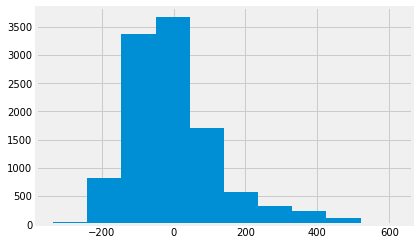

In [27]:
df['res'].hist()

##### 2). Evaluate the Mean and Standard Deviation of Your Residuals

In [28]:
df['res'].describe()

count    1.088600e+04
mean     1.369391e-14
std      1.299266e+02
min     -3.356383e+02
25%     -8.308061e+01
50%     -2.595175e+01
75%      5.320522e+01
max      6.153465e+02
Name: res, dtype: float64

In [31]:
print('MAE:', metrics.mean_absolute_error(df['count'], df['pred']))
print('MSE:', metrics.mean_squared_error(df['count'], df['pred']))

MAE: 95.47124709316773
MSE: 16879.36416016221


##### 3).  Use Seaborn's lmplot to Your Errors Against the Predicted Value:  Is There An Inherent Pattern?

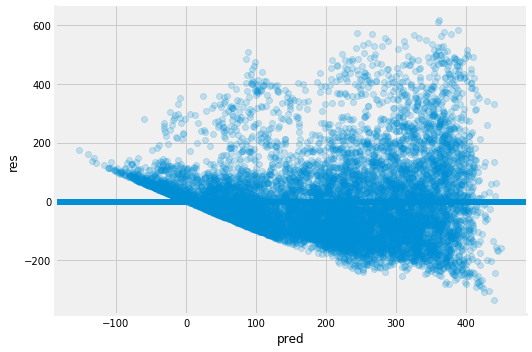

In [34]:
sns.lmplot(x='pred',
           y='res',
           data=df,
           aspect=1.5,
           scatter_kws={'alpha':0.2});